In [1]:
import os
import pickle

import numpy as np
import cv2

# %matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
FOLDER = "../data/images/cam_images/"

image = cv2.imread(FOLDER + "capture_3.jpg")

# Tentatives de pre-processing

Dans ce notebook, il y a toutes les tentatives de pre-process qui ne sont pas utilisées à present.

Ces pré-process ne sont pas implémentés pour 2 raisons :
 * les résultats ne sont pas concluants
 * nous n'avons pas trouvé d'utilité à long terme pour cette méthode

Cf partie 4 section 7 du rapport

### Liste des cellules

 1. Transformation HSV
 2. Suppression de la perspective

# Transformation HSV

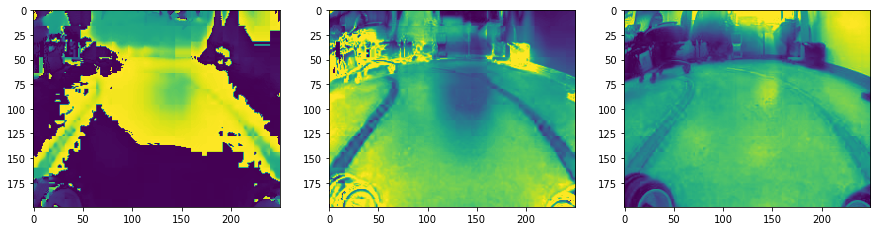

In [3]:
img = image
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.imshow(img[:, :, 0])
plt.subplot(1, 3, 2)
plt.imshow(img[:, :, 1])
plt.subplot(1, 3, 3)
plt.imshow(img[:, :, 2])
plt.show()

# Suppression de la perspective

In [4]:
img = image

width = img.shape[0]
height = img.shape[1]
x1 = 0
x2 = width
y1 = int(height/4)
y2 = int(height*6/9)
image = img[y1:y2, x1:x2]

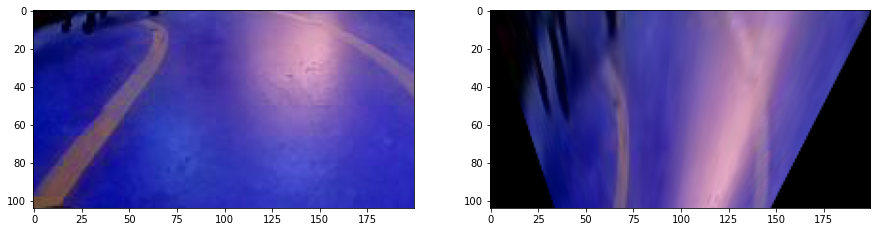

In [5]:
w, h, _ = image.shape
w_d, h_d = w, h

ratio = 0.37

src = np.array([[0, 0], [w, 0], [0, h], [w, h]], dtype=np.float32)
dest = np.array([[0, 0], [w_d, 0], [65, h_d], [w_d-22, h_d]], dtype=np.float32)

matrix = cv2.getPerspectiveTransform(src, dest)
result = cv2.warpPerspective(image, matrix, (h, w))

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

image = result